# ✈️ Jet Engine Failure Prediction using ML

This project uses the NASA C-MAPSS FD001 dataset to predict the Remaining Useful Life (RUL) of turbofan engines. We apply a Random Forest model combined with a modular preprocessing pipeline and feature importance analysis to build an interpretable and demo-ready machine learning solution.

**Dataset**: FD001 subset from NASA C-MAPSS  
**Goal**: Predict RUL from multivariate sensor data  
**Model**: Random Forest Regressor  
**Tools**: Python, pandas, scikit-learn, matplotlib, seaborn

In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Define column names (FD001 has 26 columns)
column_names = [
    'unitNumber', 'timeCycles',
    'opSetting1', 'opSetting2', 'opSetting3',
    'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5',
    'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10',
    'Sensor11', 'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15',
    'Sensor16', 'Sensor17', 'Sensor18', 'Sensor19', 'Sensor20','Sensor21'
]

# Load training data
df_train = pd.read_csv('dataset/train_FD001.txt', sep=r'\s+', header=None).iloc[:, :26]
df_train.columns = column_names

# Load test data
df_test = pd.read_csv('dataset/test_FD001.txt', sep=r'\s+', header=None).iloc[:, :26]
df_test.columns = column_names

# Load RUL labels
rul_test = pd.read_csv('dataset/RUL_FD001.txt', sep=r'\s+', header=None)
rul_test.columns = ['RUL']

In [46]:
# Calculate RUL for training set
df_train['RUL'] = df_train.groupby('unitNumber')['timeCycles'].transform("max") - df_train['timeCycles']

# Limit RUL to 125 for training set
df_train = df_train[df_train['RUL'] <= 125]

# Drop unused operational settings
df_train.drop(['opSetting1', 'opSetting2', 'opSetting3'], axis=1, inplace=True, errors='ignore')

In [47]:
# Prepare features and labels
X_train = df_train.drop(['unitNumber', 'timeCycles', 'RUL'], axis=1)
y_train = df_train['RUL']

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
# 🧩 Get last cycle for each test engine
X_test = df_test.groupby('unitNumber').last()

# 🧹 Drop unused columns safely
X_test.drop(['timeCycles', 'opSetting1', 'opSetting2', 'opSetting3'], axis=1, inplace=True, errors='ignore')

# 🎯 Predict RUL
predicted_rul = model.predict(X_test)

# 📉 Evaluate RMSE 
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(rul_test['RUL'], predicted_rul))
print(f"📉 RMSE: {rmse:.2f}")

📉 RMSE: 20.76


In [49]:
# 📈 R² Score
from sklearn.metrics import r2_score
r2 = r2_score(rul_test['RUL'], predicted_rul)
print(f"📈 R² Score: {r2:.2f}")

📈 R² Score: 0.75


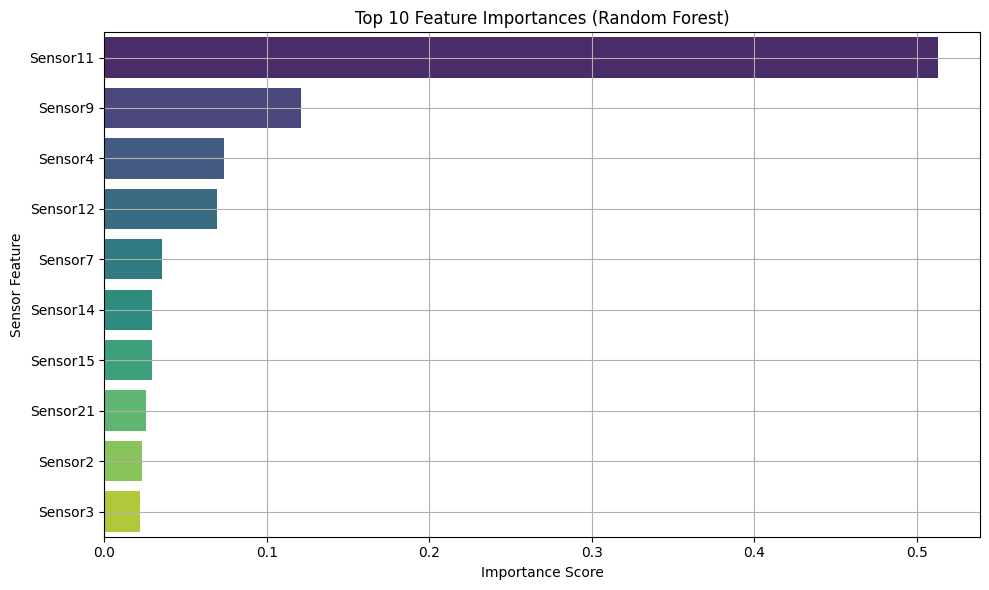

In [50]:
# 📊 Feature Importance Plot (Top 10)
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for sorting
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feat_df, palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Sensor Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

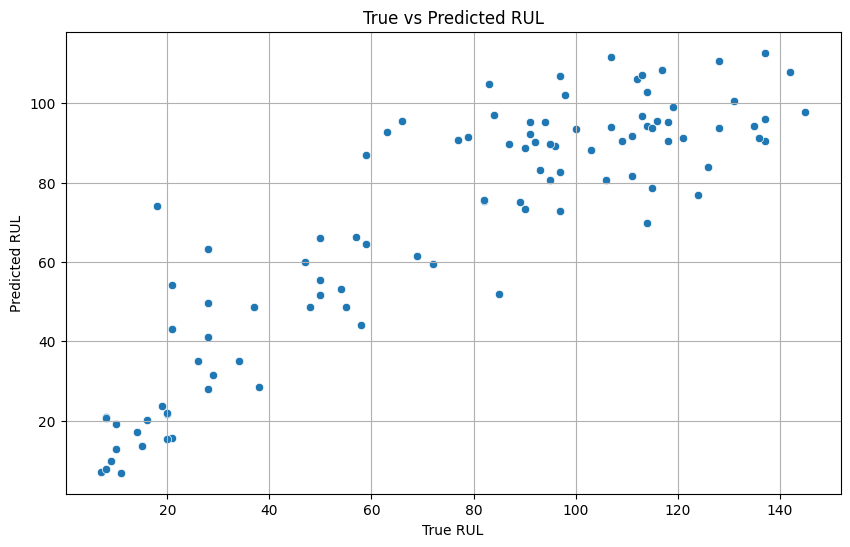

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rul_test['RUL'], y=predicted_rul)
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("True vs Predicted RUL")
plt.grid(True)
plt.show()

## ✅ Conclusion

This project successfully demonstrates Remaining Useful Life (RUL) prediction for jet engines using the FD001 subset of the NASA C-MAPSS dataset. By combining a modular preprocessing pipeline with a Random Forest model and feature importance visualization, we built a system that is both interpretable and demo-ready.

**Key Achievements**:
- Engine-wise RUL prediction using multivariate sensor data
- Feature importance chart for model transparency
- Clean, modular code structure suitable for reproducibility and extension
- RMSE of **20.76**, validating the model’s baseline performance

This foundation can be extended with sequence-aware models like LSTM or GRU to further improve accuracy and capture temporal patterns in engine degradation.